 Part B: News Article Classification

In [12]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Load News Dataset
news = pd.read_csv('data_news.csv')

In [14]:
# Data Exploration
print("First 5 Rows:\n", news.head())
print("\nDataset Info:\n")
print(news.info())
print("\nCategory Distribution:\n", news['category'].value_counts())

First 5 Rows:
    category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, 

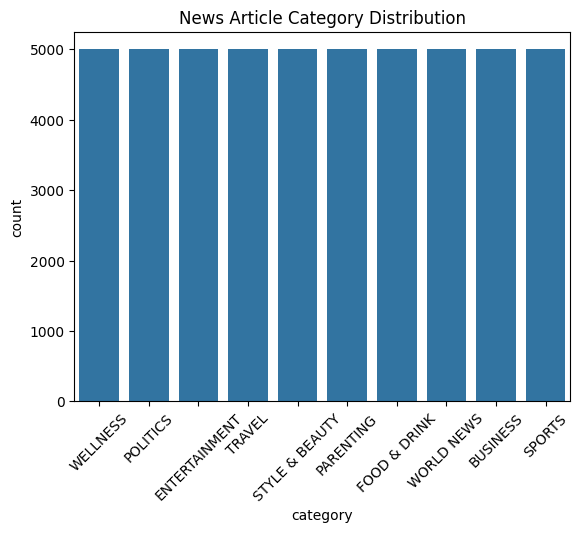

In [15]:
# Visualizing Category Distribution
sns.countplot(x='category', data=news)
plt.title("News Article Category Distribution")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Text Cleaning Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [17]:
# Text Cleaning Function
def clean_news(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)                  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)                # Remove Punctuation
    words = word_tokenize(text)                        # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove Stopwords
    words = [lemmatizer.lemmatize(word) for word in words]      # Lemmatize
    words = [stemmer.stem(word) for word in words]             # Stem
    return " ".join(words)

In [18]:
# Combine Headline and Short Description for Better Context
news['combined'] = news['headline'] + " " + news['short_description']

In [19]:
# Apply Cleaning
news['clean_text'] = news['combined'].apply(clean_news)

In [20]:
# Display Top 20 Frequent Words
news_words = ' '.join(news['clean_text']).split()
news_word_freq = Counter(news_words).most_common(20)
print("\nMost Common Words in News Articles:")
for word, freq in news_word_freq:
    print(f"{word}: {freq}")


Most Common Words in News Articles:
new: 5160
photo: 5137
one: 4626
u: 4138
make: 3952
time: 3859
year: 3857
day: 3729
get: 3719
like: 3584
way: 2872
say: 2825
world: 2821
peopl: 2769
want: 2575
look: 2553
go: 2531
life: 2513
best: 2509
first: 2382


In [21]:
# TF-IDF Feature Extraction
vectorizer_news = TfidfVectorizer(max_features=5000)
X_news = vectorizer_news.fit_transform(news['clean_text']).toarray()

In [22]:
# Label Encoding for News Categories
le = LabelEncoder()
y_news = le.fit_transform(news['category'])

In [23]:
# Train-Test Split
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(
    X_news, y_news, test_size=0.2, random_state=42)

In [24]:
# Model Training and Evaluation
models_news = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB()
}


Model: Logistic Regression
                precision    recall  f1-score   support

      BUSINESS       0.73      0.78      0.75       955
 ENTERTAINMENT       0.78      0.79      0.78       985
  FOOD & DRINK       0.86      0.83      0.84      1021
     PARENTING       0.80      0.76      0.78      1030
      POLITICS       0.80      0.75      0.77      1034
        SPORTS       0.87      0.89      0.88       995
STYLE & BEAUTY       0.87      0.85      0.86       986
        TRAVEL       0.83      0.81      0.82      1008
      WELLNESS       0.71      0.75      0.73      1009
    WORLD NEWS       0.80      0.80      0.80       977

      accuracy                           0.80     10000
     macro avg       0.80      0.80      0.80     10000
  weighted avg       0.80      0.80      0.80     10000



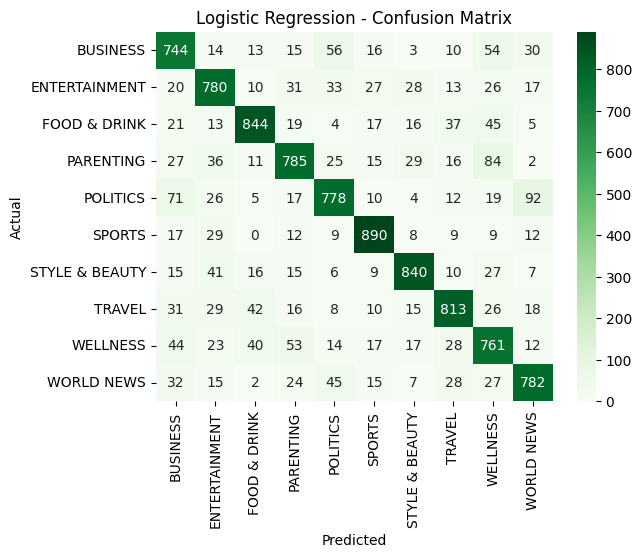


Model: Naive Bayes
                precision    recall  f1-score   support

      BUSINESS       0.71      0.73      0.72       955
 ENTERTAINMENT       0.81      0.75      0.78       985
  FOOD & DRINK       0.84      0.85      0.84      1021
     PARENTING       0.69      0.75      0.72      1030
      POLITICS       0.79      0.73      0.76      1034
        SPORTS       0.87      0.86      0.87       995
STYLE & BEAUTY       0.85      0.84      0.85       986
        TRAVEL       0.80      0.81      0.80      1008
      WELLNESS       0.71      0.74      0.73      1009
    WORLD NEWS       0.78      0.80      0.79       977

      accuracy                           0.78     10000
     macro avg       0.79      0.78      0.79     10000
  weighted avg       0.79      0.78      0.79     10000



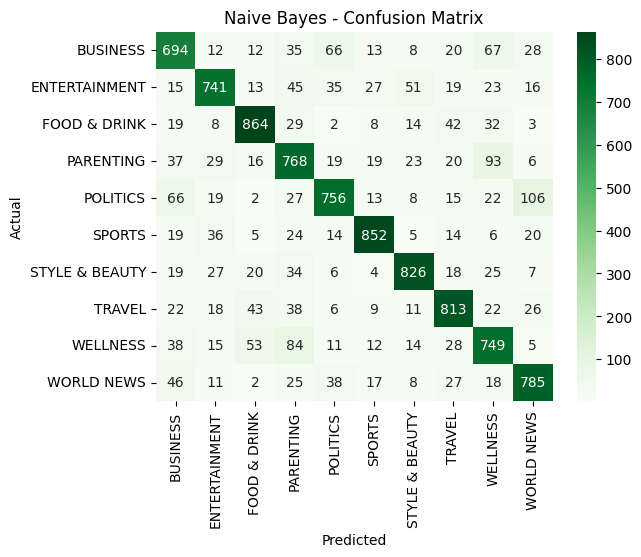

In [25]:
for name, model in models_news.items():
    model.fit(X_train_news, y_train_news)
    y_pred_news = model.predict(X_test_news)
    print(f"\nModel: {name}")
    print(classification_report(y_test_news, y_pred_news, target_names=le.classes_))
    cm = confusion_matrix(y_test_news, y_pred_news)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [26]:
# Cross-Validation (Logistic Regression for News)
log_reg_news = LogisticRegression(max_iter=1000)
cv_scores_news = cross_val_score(log_reg_news, X_news, y_news, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores (Logistic Regression - News):", cv_scores_news)
print("Mean CV Accuracy:", np.mean(cv_scores_news))


Cross-Validation Accuracy Scores (Logistic Regression - News): [0.7847 0.7881 0.7817 0.7894 0.7916]
Mean CV Accuracy: 0.7870999999999999
